<a href="https://colab.research.google.com/github/MorrisNexGenAI/plants/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!git clone https://github.com/fastai/fastbook.git

Cloning into 'fastbook'...
remote: Enumerating objects: 2762, done.
remote: Counting objects: 100% (385/385), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 2762 (delta 341), reused 336 (delta 336), pack-reused 2377 (from 1)
Receiving objects: 100% (2762/2762), 84.10 MiB | 46.65 MiB/s, done.
Resolving deltas: 100% (1591/1591), done.


In [ ]:
from fastai.vision.all import *

path = download_data('https://archive.org/download/plantvillage-dataset/PlantVillage.tar', extract=True)


NameError: name 'download_data' is not defined

In [ ]:
!pip install fastai --upgrade


In [ ]:
from fastai.vision.all import *


In [ ]:
download_data


NameError: name 'download_data' is not defined

In [ ]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git


Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163235, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 163235 (delta 2), reused 1 (delta 0), pack-reused 163229 (from 1)
Receiving objects: 100% (163235/163235), 2.00 GiB | 42.47 MiB/s, done.
Resolving deltas: 100% (101/101), done.
Updating files: 100% (182401/182401), done.


In [ ]:
from fastai.vision.all import *
path = Path('/content/PlantVillage-Dataset/raw/color')


In [10]:
class DataLoader(GetAttr):
  def __init__(self, *loaders): self.loader = loaders
  def __getitem__(self, i): return self.loaders(i)
  train,valid = add_props(lambda i, self: self[i])

In [11]:
plants = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)

)

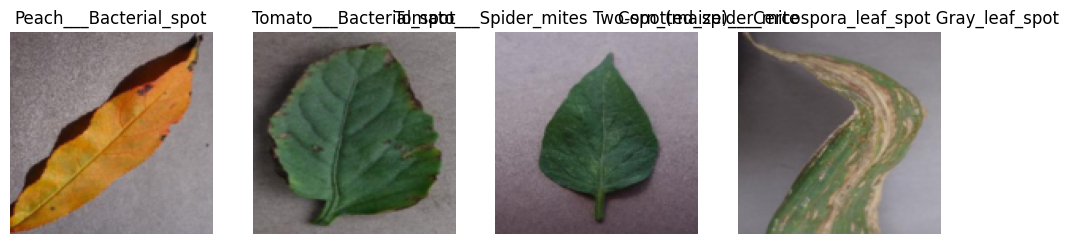

In [12]:
plants = plants.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = plants.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

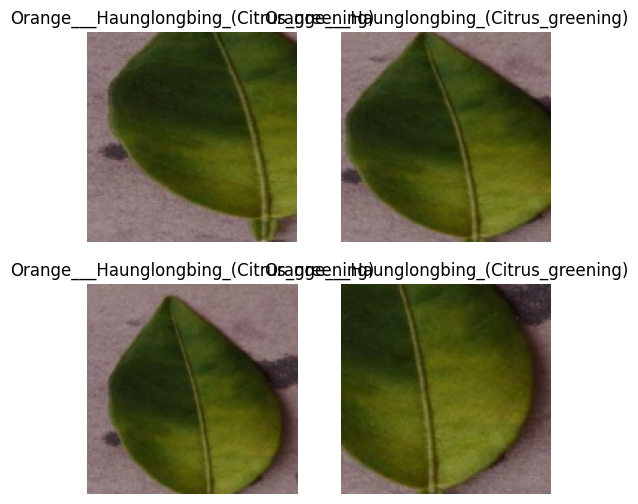

In [13]:
plants = plants.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = plants.dataloaders(path)
dls.train.show_batch(max_n=4, unique=True)

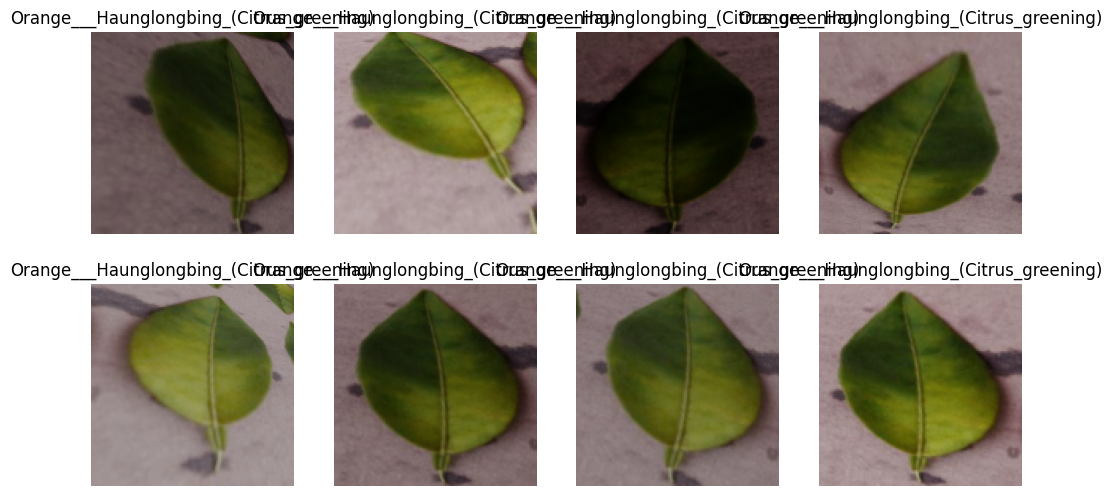

In [15]:
plants = plants.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = plants.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [16]:
plants = plants.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
)
dls = plants.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.12/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 170MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.399349,0.366886,0.115643,02:40


epoch,train_loss,valid_loss,error_rate,time
0,0.164874,0.145479,0.045760,02:52
1,0.095569,0.117003,0.033883,02:51


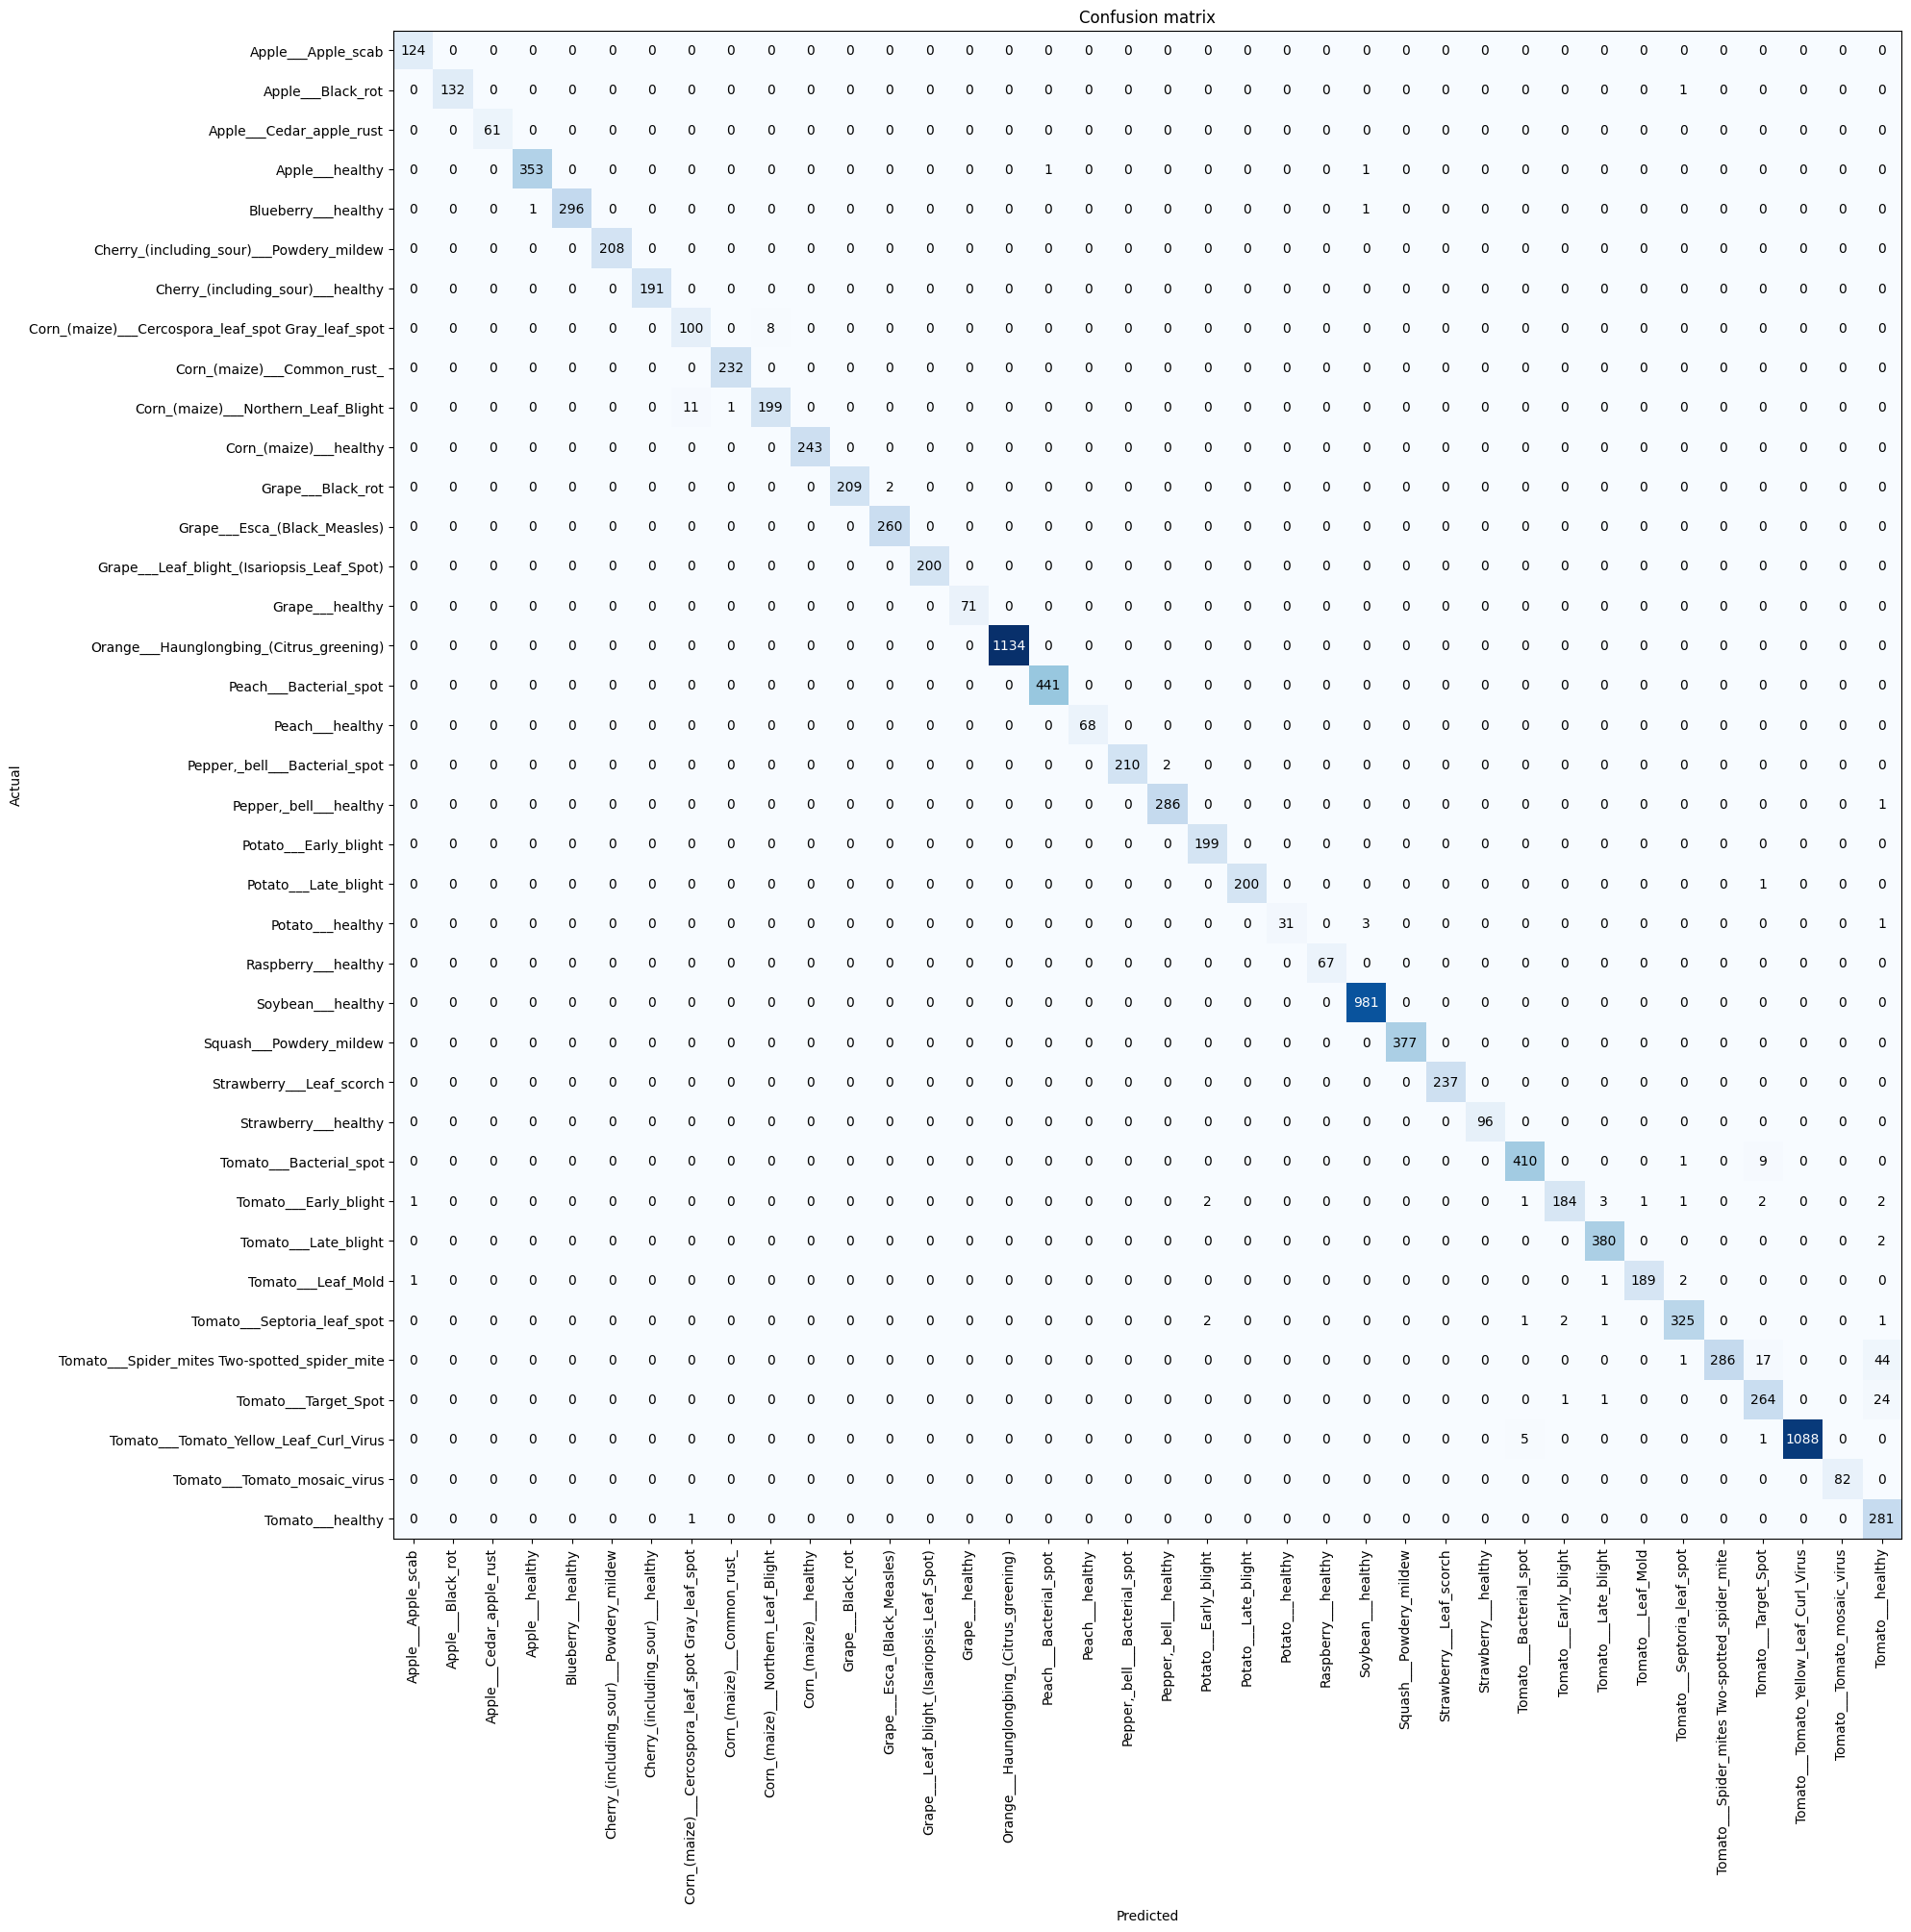

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(20,20), dpi=100)


In [21]:
interp.most_confused(min_val=3)


[('Tomato___Spider_mites Two-spotted_spider_mite',
  'Tomato___healthy',
  np.int64(44)),
 ('Tomato___Target_Spot', 'Tomato___healthy', np.int64(24)),
 ('Tomato___Spider_mites Two-spotted_spider_mite',
  'Tomato___Target_Spot',
  np.int64(17)),
 ('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  np.int64(11)),
 ('Tomato___Bacterial_spot', 'Tomato___Target_Spot', np.int64(9)),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  np.int64(8)),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus',
  'Tomato___Bacterial_spot',
  np.int64(5)),
 ('Potato___healthy', 'Soybean___healthy', np.int64(3)),
 ('Tomato___Early_blight', 'Tomato___Late_blight', np.int64(3))]

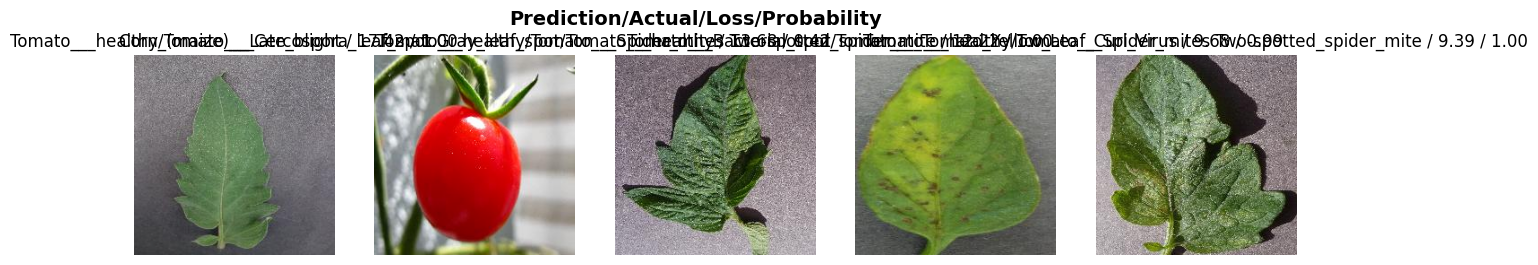

In [22]:
interp.plot_top_losses(5,nrows=1)

In [23]:
cleaner = ImageClassifierCleaner(learn)
cleaner

NameError: name 'ImageClassifierCleaner' is not defined

In [24]:
learn.export()

In [25]:
path = path()
path.ls(file_exts='.pkl')

TypeError: 'PosixPath' object is not callable

In [26]:
learn_inf = load_learner(path/'export.pkl')

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/PlantVillage-Dataset/raw/color/export.pkl'

In [27]:
learn_inf = load_learner('export.pkl')

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [29]:
import ipywidgets as widgets

btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [36]:
img = PILImage.create(btn_upload.data[-1])

In [37]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [38]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [46]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  ibl_pred = widgets.Label()
  ibl_pred.value = f'prediction: {pred}; Probability: {probs[pred_idx]:.045f}'
  ibl_pred
btn_run.on_click(on_click_classify)

In [40]:
from ipywidgets import VBox

In [50]:
pred,pred_idx,probs = learn_inf.predict(img)

In [51]:
ibl_pred = widgets.Label()
ibl_pred.value = f'prediction: {pred}; Probability: {probs[pred_idx]:.045f}'
ibl_pred

VBox([widgets.Label('Select your plant!'),
      btn_upload, btn_run, out_pl, ibl_pred])

In [52]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 6.2 MB/s eta 0:00:00
Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.11 OK
